In [1]:
import pandas as pd
from statsmodels.multivariate.manova import MANOVA
from  matplotlib import pyplot as plt
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
!wget https://reneshbedre.github.io/assets/posts/ancova/manova_data.csv

--2021-10-15 09:18:07--  https://reneshbedre.github.io/assets/posts/ancova/manova_data.csv
Resolving reneshbedre.github.io (reneshbedre.github.io)... 185.199.110.153, 185.199.109.153, 185.199.108.153, ...
Connecting to reneshbedre.github.io (reneshbedre.github.io)|185.199.110.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 455 [text/csv]
Saving to: ‘manova_data.csv.3’

manova_data.csv.3   100%[===================>]     455  --.-KB/s    in 0s      

2021-10-15 09:18:07 (23.6 MB/s) - ‘manova_data.csv.3’ saved [455/455]



In [3]:
df = pd.read_csv('manova_data.csv')
df

,plant_var,height,canopy_vol
0,A,20.0,0.70
1,A,22.0,0.80
2,A,24.0,0.95
3,A,18.0,0.60
4,A,20.0,0.74
5,A,20.0,0.76
6,A,16.0,0.84
7,A,17.0,0.66
8,A,18.0,0.99
9,A,14.0,0.80


In [4]:
df.describe()

,height,canopy_vol
count,40.000000,40.000000
mean,11.960000,0.534500
std,6.627751,0.219801
min,2.000000,0.100000
25%,5.750000,0.385000
50%,13.000000,0.545000
75%,17.250000,0.692500
max,24.000000,0.990000


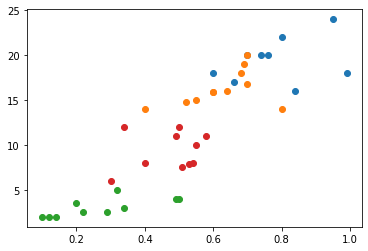

In [5]:
plt.scatter(df['canopy_vol'][:9],df['height'][:9])
plt.scatter(df['canopy_vol'][9:20],df['height'][9:20])
plt.scatter(df['canopy_vol'][20:30],df['height'][20:30])
plt.scatter(df['canopy_vol'][30:],df['height'][30:])

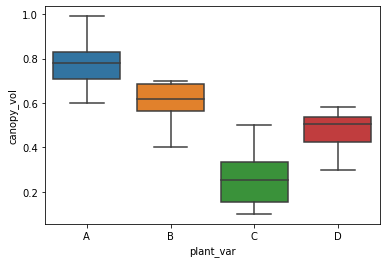

In [6]:
sns.boxplot(x="plant_var",y="canopy_vol", data=df)

### Applying MANOVA

In [7]:
maov = MANOVA.from_formula('height + canopy_vol  ~ plant_var', data=df)
print(maov.mv_test())

                  Multivariate linear model
                                                              
--------------------------------------------------------------
       Intercept         Value  Num DF  Den DF F Value  Pr > F
--------------------------------------------------------------
          Wilks' lambda  0.0374 2.0000 35.0000 450.0766 0.0000
         Pillai's trace  0.9626 2.0000 35.0000 450.0766 0.0000
 Hotelling-Lawley trace 25.7187 2.0000 35.0000 450.0766 0.0000
    Roy's greatest root 25.7187 2.0000 35.0000 450.0766 0.0000
--------------------------------------------------------------
                                                              
--------------------------------------------------------------
       plant_var         Value  Num DF  Den DF F Value  Pr > F
--------------------------------------------------------------
          Wilks' lambda  0.0797 6.0000 70.0000  29.6513 0.0000
         Pillai's trace  1.0365 6.0000 72.0000  12.9093 0.0000
 Hotelling-